# Prediction of CO2 emission on the Basis of Technical Parameters of vehicles using linear regression technique

**`FuelConsumption.csv`** is a vehicle fuel consumption data set that contains model-specific fuel consumption.
-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE (L)** e.g. 2.0
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.sample(6)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
727,2014,MERCEDES-BENZ,C 350 4MATIC,COMPACT,3.5,6,AS7,Z,11.9,8.6,10.4,27,239
81,2014,BMW,328i,COMPACT,2.0,4,A8,Z,10.0,6.5,8.4,34,193
904,2014,PORSCHE,PANAMERA 4S EXECUTIVE,FULL-SIZE,3.0,6,AM7,Z,13.7,8.9,11.5,25,264
252,2014,CHEVROLET,SONIC 5,MID-SIZE,1.4,4,M6,X,8.5,6.2,7.5,38,172
906,2014,PORSCHE,PANAMERA S,FULL-SIZE,3.0,6,AM7,Z,13.4,8.8,11.3,25,260
888,2014,PORSCHE,BOXSTER S,TWO-SEATER,3.4,6,AM7,Z,11.3,7.9,9.8,29,225


In [4]:
corr = data.corr()
corr

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [5]:
correlation = data[['ENGINESIZE','CO2EMISSIONS']].corr()
print('Correlation between CO2 emission and engine size is ' + str(correlation['CO2EMISSIONS']['ENGINESIZE']))

Correlation between CO2 emission and engine size is 0.8741543683958108


ENGINESIZE is well correlated with CO2EMISSIONS (correlation of 0.87 is rather close to 1) so it can be taken as a unique predictor for the CO2 emission.

In [6]:
X = data['ENGINESIZE'].values.reshape(-1,1)
y = data['CO2EMISSIONS'].values.reshape(-1,1)

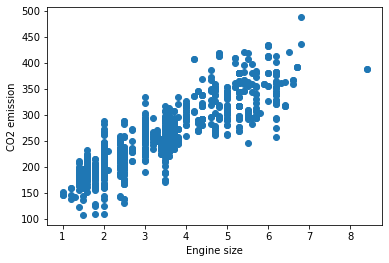

In [7]:
plt.scatter(X, y)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

The scatter plot looks linear so probably the regression model will fit well.

* Train a linear regression model for the prediction of the CO2 emission based exclusively on the engine size

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [10]:
print('Coefficients: ', regr.coef_[0][0])
print('Intercept: ', regr.intercept_[0])

Coefficients:  39.85725417403618
Intercept:  125.07790674626347


* Plot the fit line over the data.

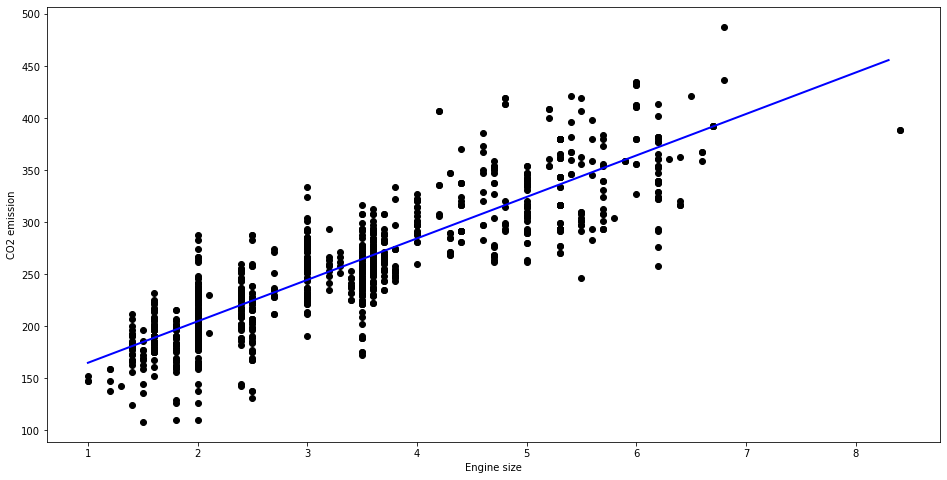

In [11]:
X_plot = np.arange(min(X), max(X), 0.1)
y_plot = regr.predict(X_plot.reshape(-1, 1))

plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(X_plot, y_plot, c='blue', linewidth=2)
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

* Distribution of the residuals (i.e. the error terms).

In [12]:
y_pred = regr.predict(X_test)

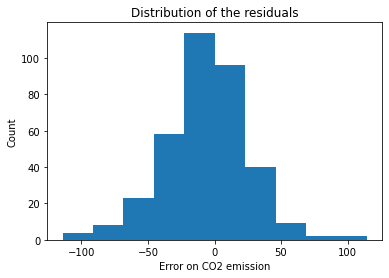

In [13]:
residuals =  y_test - y_pred
plt.hist(x=residuals)
plt.xlabel('Error on CO2 emission')
plt.ylabel('Count')
plt.title("Distribution of the residuals")
plt.show()

* Model accuracy.

In [14]:
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 373781.28
Mean absolute error (MAE): 24.86
Mean square error (MSE): 1049.95
Root mean square error (RMSE): 32.40


* Train a linear regression model for the prediction of the CO2 emission now based exclusively on the combined fuel consumption (FUELCONSUMPTION_COMB)

In [15]:
X = data['FUELCONSUMPTION_COMB'].values.reshape(-1,1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = regr.predict(X_test)

print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 309995.19
Mean absolute error (MAE): 20.34
Mean square error (MSE): 870.77
Root mean square error (RMSE): 29.51


The RMSE is lower here (29.51 here vs. 32.40 before) so it seems that combined fuel consumption is a slightly better predictor than engine size for CO2 consumption prediction.